In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Image wrapping

In [ ]:
def wrap_image_with_border(input_image_path, border_size=10, border_color=(255, 0, 0)):
    # Read the image
    original_image = cv2.imread(input_image_path)

    # Calculate the new size for the wrapped image
    new_width = original_image.shape[1] + 20 * border_size
    new_height = original_image.shape[0] + 20 * border_size

    # Create a new image with the calculated size and a white background
    wrapped_image = np.full((new_height, new_width, 3), border_color, dtype=np.uint8)

    # Paste the original image onto the center of the new image
    wrapped_image[border_size:border_size + original_image.shape[0], border_size:border_size + original_image.shape[1]] = original_image

    return wrapped_image

# Image scaling

In [ ]:
def reduce_resolution(input_image_path, scale_percent):
    # Read the image
    original_image = cv2.imread(input_image_path)

    # Get the original image dimensions
    height, width = original_image.shape[:2]

    # Calculate the new dimensions based on the scale_percent
    new_width = int(width * scale_percent / 100)
    new_height = int(height * scale_percent / 100)

    # Resize the image
    resized_image = cv2.resize(original_image, (new_width, new_height))

    return resized_image

# Image equalization

In [ ]:
def equalize_image(input_image_path):
    # Read the image in grayscale
    original_image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

    # Apply histogram equalization
    equalized_image = cv2.equalizeHist(original_image)

    return equalized_image

# Adaptive equalization

In [ ]:
def adaptive_equalize_image(input_image_path, clip_limit=2.0, grid_size=(8, 8)):
    # Read the image in grayscale
    original_image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

    # Create a CLAHE (Contrast Limited Adaptive Histogram Equalization) object
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=grid_size)

    # Apply adaptive histogram equalization
    equalized_image = clahe.apply(original_image)

    return equalized_image

# Gaussian Noise

In [ ]:
def add_gaussian_noise(input_path, mean=0, std=25):

    image = cv2.imread(input_path)

    # Generate Gaussian noise
    row, col, ch = image.shape
    gauss = np.random.normal(mean, std, (row, col, ch))

    # Add the noise to the image
    noisy = image + gauss

    # Ensure pixel values are within the valid range [0, 255]
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)

    return noisy

# Geometric transformation(scaling, rotation, shearing, translation)

In [ ]:
def geometric_transformations(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Translation
    rows, cols, _ = image.shape
    translation_matrix = np.float32([[1, 0, 50], [0, 1, 30]])  # Translate by (50, 30)
    translated_image = cv2.warpAffine(image, translation_matrix, (cols, rows))

    # Rotation
    rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), 35, 1)  # Rotate by 45 degrees
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))

    # Scaling
    scaling_matrix = np.float32([[0.5, 0, 0], [0, .5, 0]])  # Scale by 0.5 in the x-axis and 1.5 in the y-axis
    scaled_image = cv2.warpAffine(image, scaling_matrix, (cols, rows))

    # Shearing
    shear_matrix = np.float32([[1, 0.25, 0], [0.25, 1, 0]])  # Shear in the x-axis
    sheared_image = cv2.warpAffine(image, shear_matrix, (cols, rows))

    return translated_image, rotated_image, scaled_image, sheared_image

# Image sharpening


In [ ]:
def image_sharpenging(input_path):
    original= cv2.imread(input_path, cv2.IMREAD_UNCHANGED)

    # create a sharpening kernel
    sharpen_filter=np.array([[-1,-1,-1],
                    [-1,9,-1],
                    [-1,-1,-1]])
    # applying kernels to the input image to get the sharpened image

    sharp_image = cv2.filter2D(original,-1,sharpen_filter)
    sharp_image = cv2.cvtColor(sharp_image, cv2.COLOR_BGR2RGB)
    return sharp_image

# Image Brightening

In [ ]:
def brighten_image(image_path, alpha=1.5, beta=15):
    # alpha: controls the contrast (1.0 means no change)
    # beta: controls the brightness
    original_image = cv2.imread(image_path)


    # Convert image to float32 for the arithmetic
    result = np.float32(original_image)

    # Perform brightness and contrast adjustment
    result = alpha * result + beta

    # Clip the pixel values to be in the valid range [0, 255]
    result = np.clip(result, 0, 255)

    # Convert back to uint8
    result = np.uint8(result)

    return result
brightened_image = brighten_image(input_path)


In [ ]:
input_path = "/content/citizenship.jpg"
original_image = cv2.imread(input_path)

wrapped_image = wrap_image_with_border(input_path, border_size=10, border_color=(25,113, 200))

scale_percent = 40
resized_image = reduce_resolution(input_path, scale_percent)

equalized_image = equalize_image(input_path)

adaptive_equalize_image = adaptive_equalize_image(input_path)

noisy_image = add_gaussian_noise(input_path)

translated_image, rotated_image, scaled_image, sheared_image = geometric_transformations(input_path)

sharp_image = image_sharpenging(input_path)

brightened_image = brighten_image(input_path)



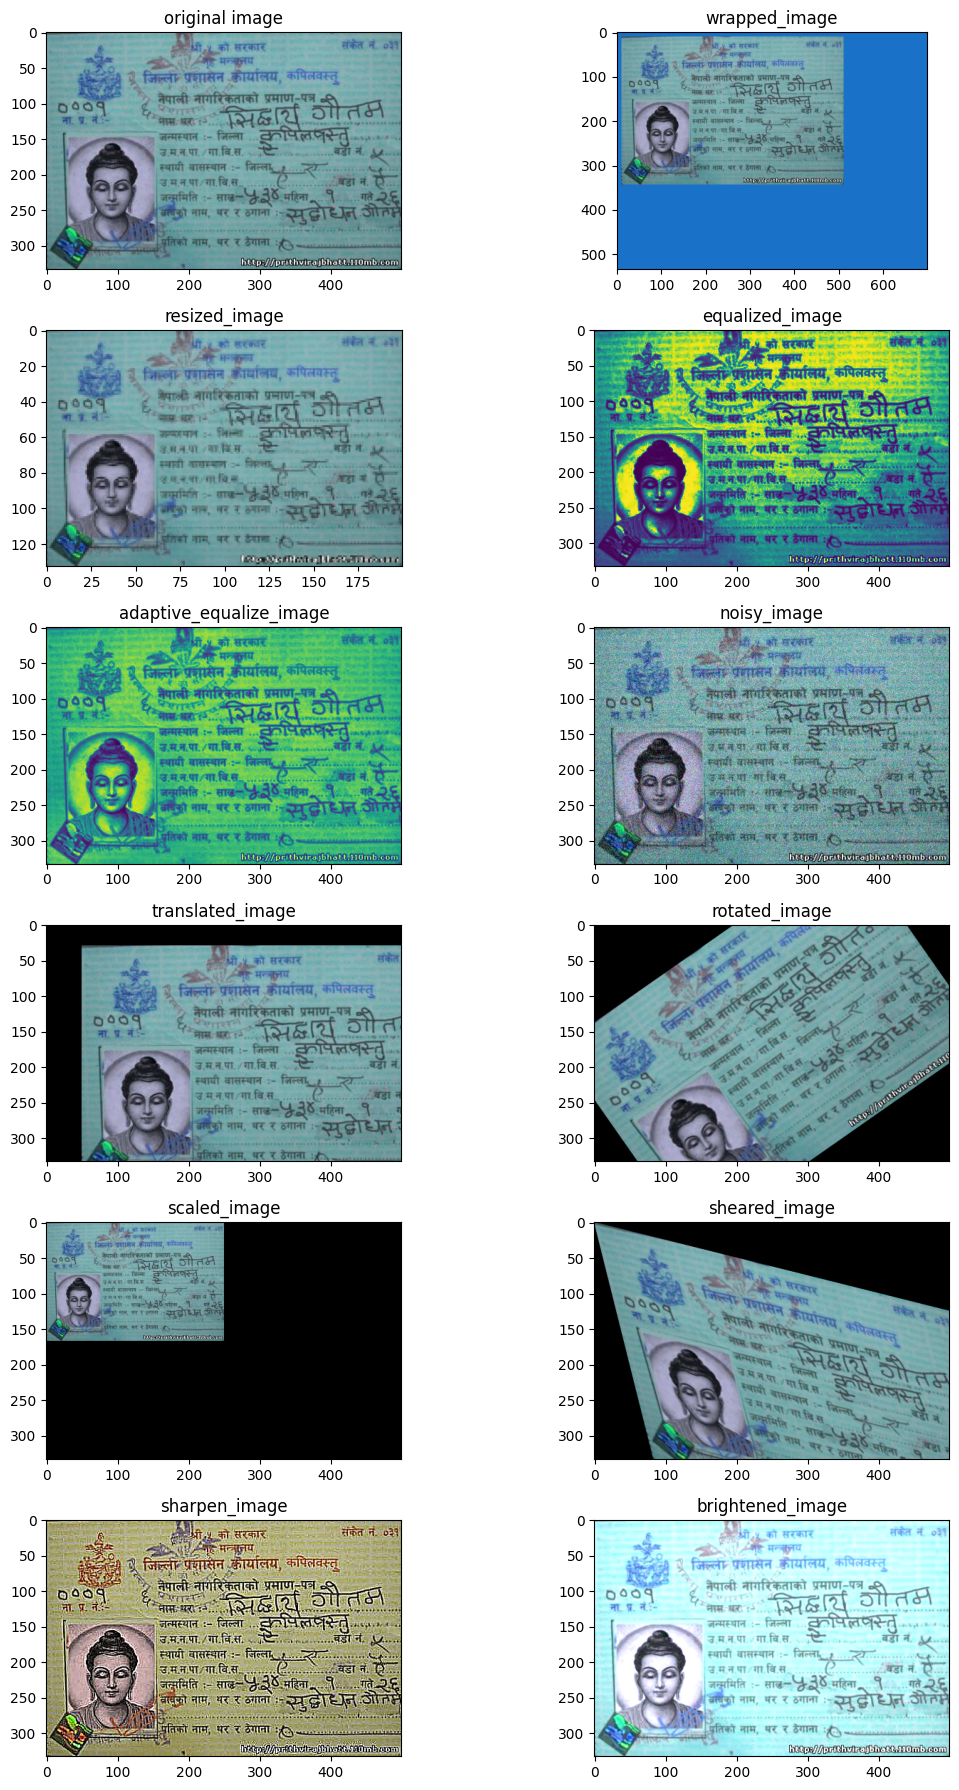

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12, 18))

axes[0, 0].imshow(original_image)
axes[0, 0].set_title("original image")

axes[0, 1].imshow(wrapped_image)
axes[0, 1].set_title("wrapped_image")

axes[1, 0].imshow(resized_image)
axes[1, 0].set_title("resized_image")

axes[1, 1].imshow(equalized_image)
axes[1, 1].set_title("equalized_image")

axes[2, 0].imshow(adaptive_equalize_image)
axes[2, 0].set_title("adaptive_equalize_image")

axes[2, 1].imshow(noisy_image)
axes[2, 1].set_title("noisy_image")

axes[3, 0].imshow(translated_image)
axes[3, 0].set_title("translated_image")

axes[3, 1].imshow(rotated_image)
axes[3, 1].set_title("rotated_image")

axes[4, 0].imshow(scaled_image)
axes[4, 0].set_title("scaled_image")

axes[4, 1].imshow(sheared_image)
axes[4, 1].set_title("sheared_image")

axes[5, 0].imshow(sharp_image)
axes[5, 0].set_title("sharpen_image")

axes[5, 1].imshow(brightened_image)
axes[5, 1].set_title("brightened_image")

plt.tight_layout()
plt.show()
